In [1]:
import sys

from  tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
from sklearn.model_selection import train_test_split
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-12.4-arm64-arm-64bit
Tensor Flow Version: 2.14.0

Python 3.11.4 (main, Jul  5 2023, 08:40:20) [Clang 14.0.6 ]
Pandas 2.1.1
Scikit-Learn 1.3.1
SciPy 1.11.3
GPU is available


Load Data for Binary and Regression Models

In [2]:
data=pd.read_csv("ChurnModeling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data = data[["CreditScore","Geography","Gender","Age", 
            "Tenure","Balance","NumOfProducts","HasCrCard",
             "IsActiveMember","EstimatedSalary", "Exited"]]  

data.shape

(10000, 11)

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 67'. Pick better value with 'binwidth'.


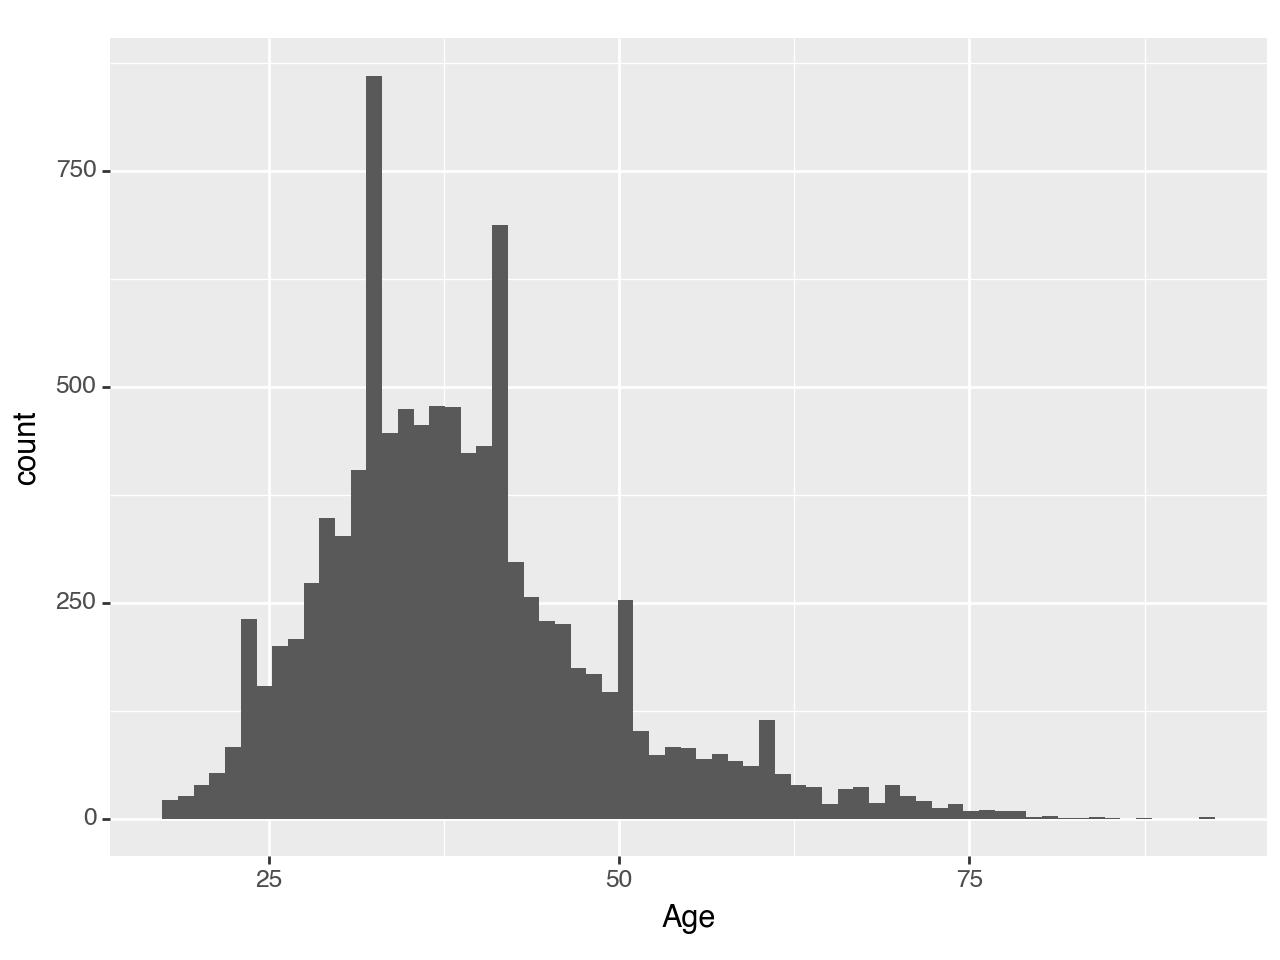

<Figure Size: (640 x 480)>

In [5]:
(ggplot(data, aes(x = "Age")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


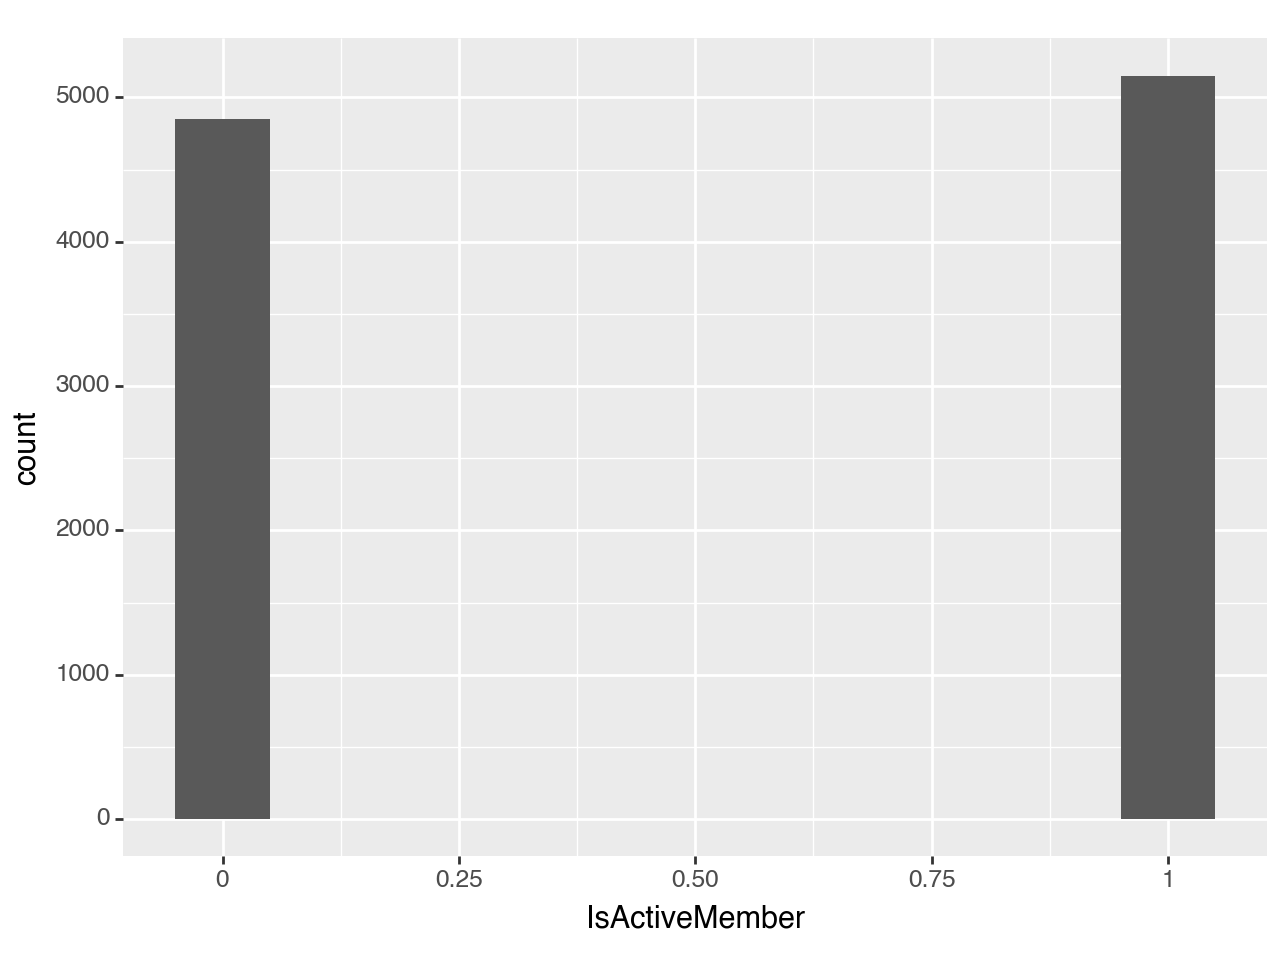

<Figure Size: (640 x 480)>

In [6]:
(ggplot(data, aes(x = "IsActiveMember")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 100'. Pick better value with 'binwidth'.


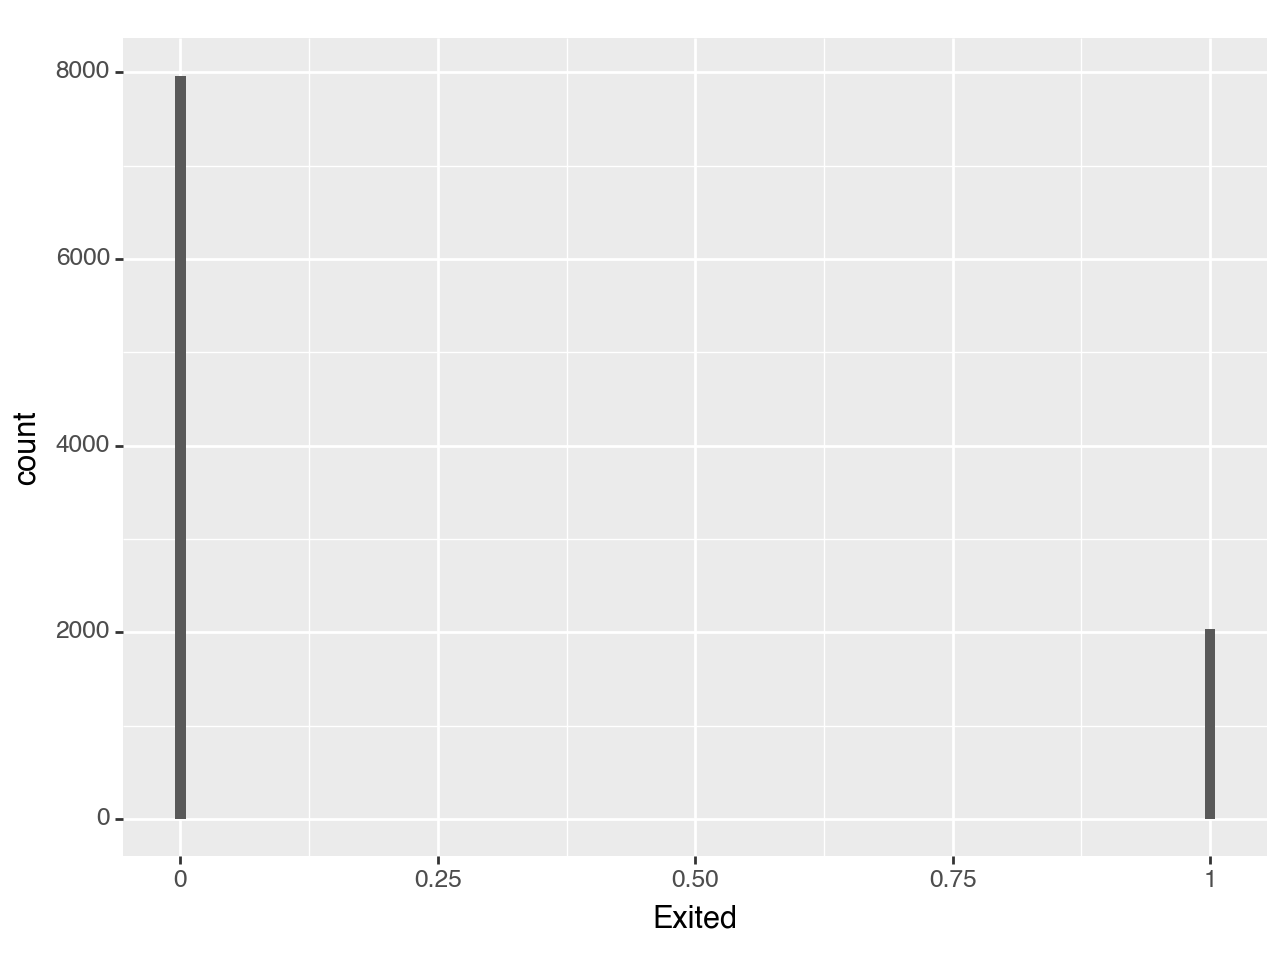

<Figure Size: (640 x 480)>

In [7]:
(ggplot(data, aes(x = "Exited")) + geom_histogram())

Data Visualization

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 41'. Pick better value with 'binwidth'.


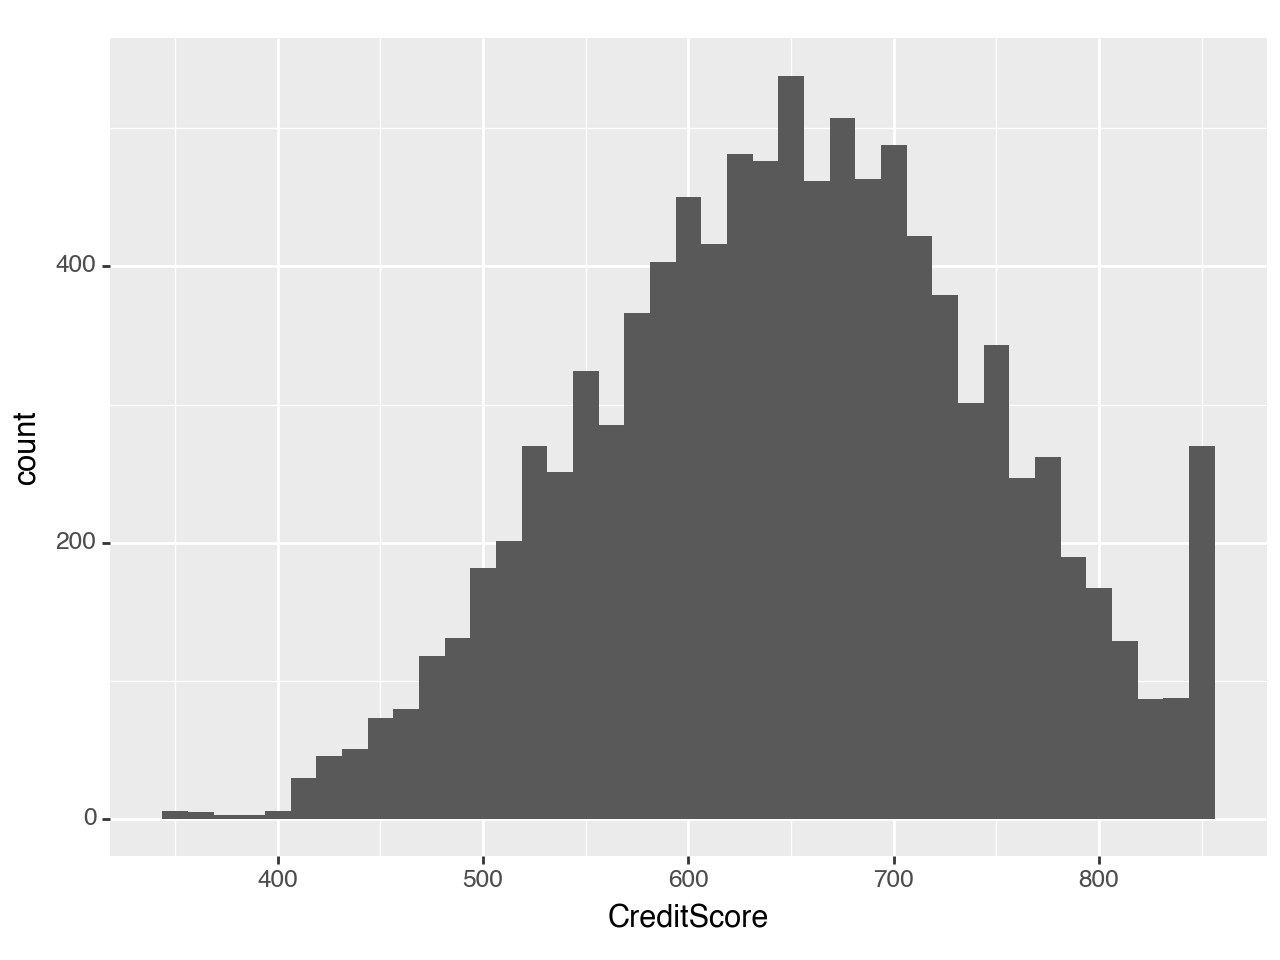

<Figure Size: (640 x 480)>

In [8]:
(ggplot(data, aes(x = "CreditScore")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 67'. Pick better value with 'binwidth'.


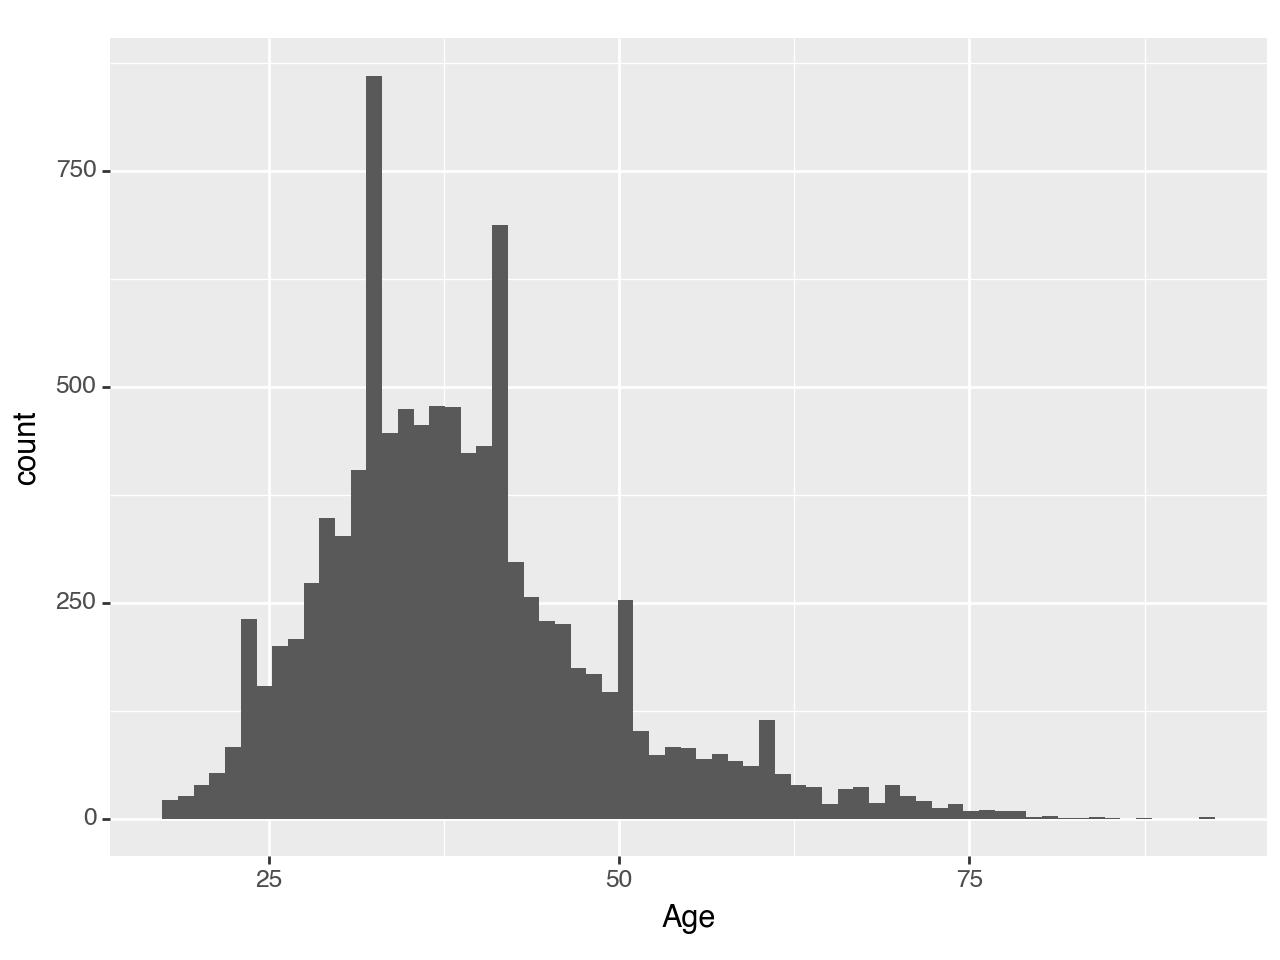

<Figure Size: (640 x 480)>

In [9]:
(ggplot(data, aes(x = "Age")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 22'. Pick better value with 'binwidth'.


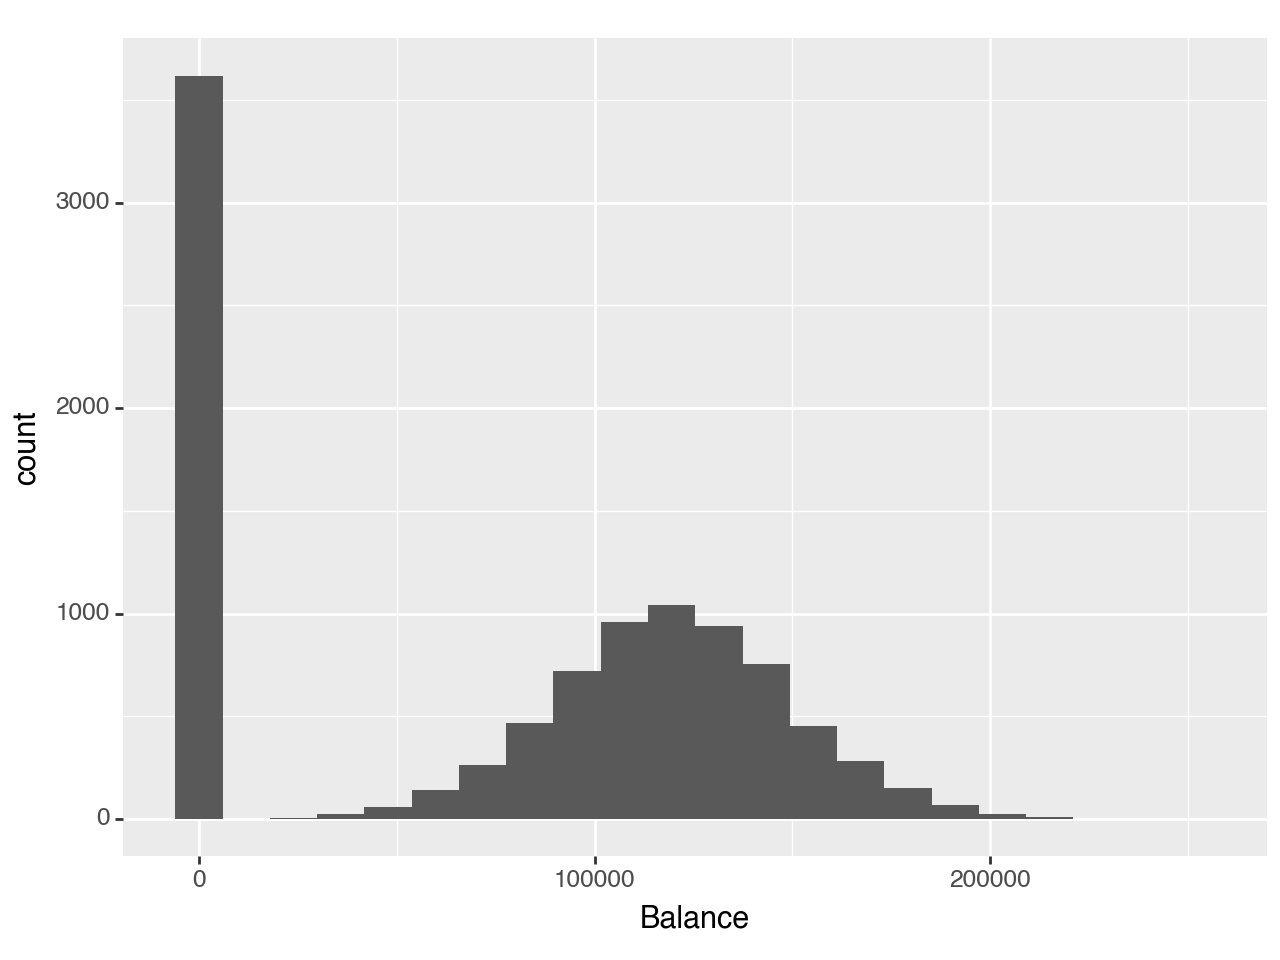

<Figure Size: (640 x 480)>

In [10]:
(ggplot(data, aes(x = "Balance")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 22'. Pick better value with 'binwidth'.


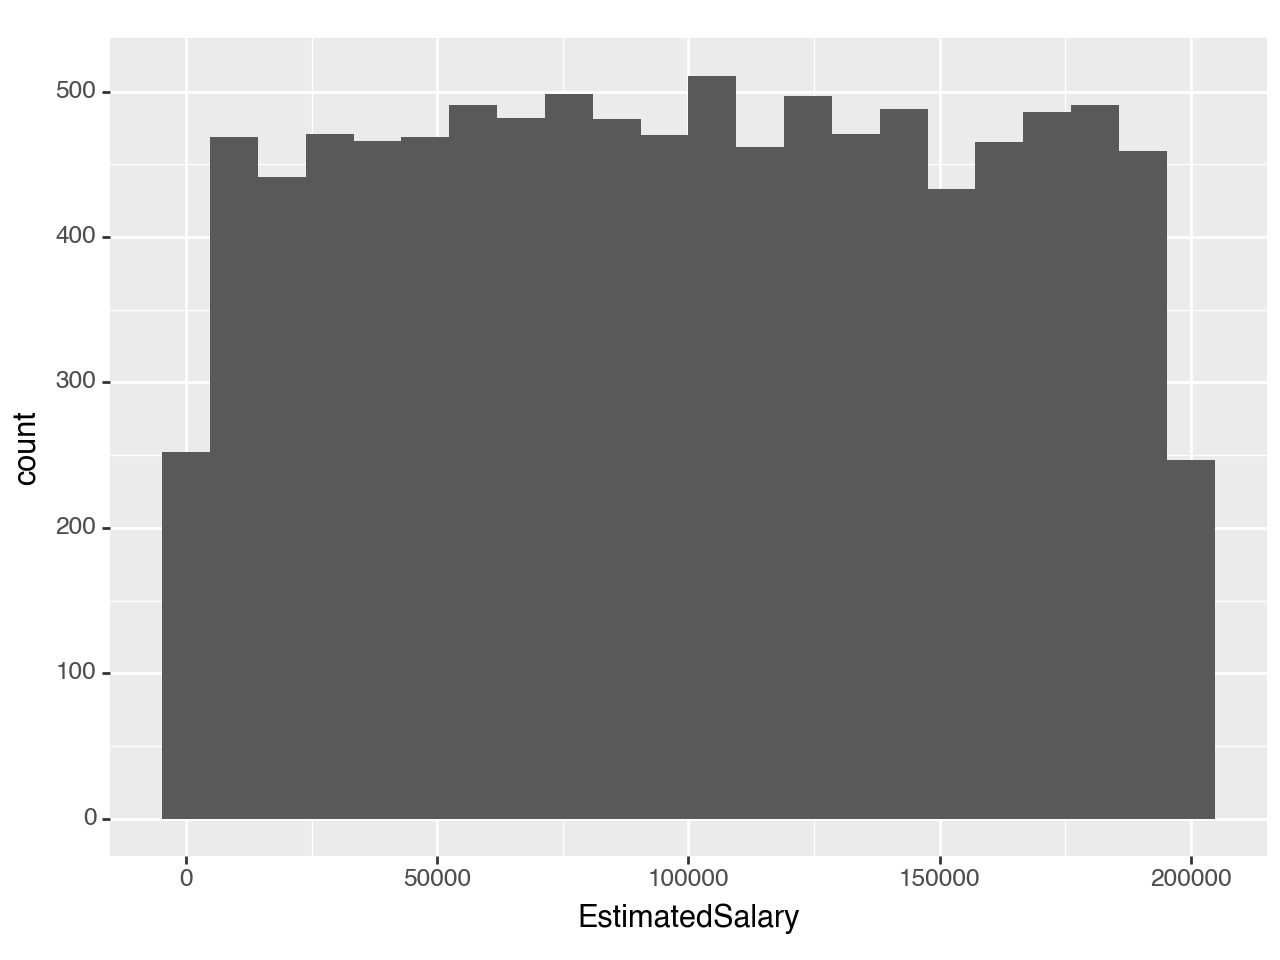

<Figure Size: (640 x 480)>

In [11]:
(ggplot(data, aes(x = "EstimatedSalary")) + geom_histogram())

In [12]:
selected_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
df_corr = data[selected_columns]

corr_matrix = df_corr.corr()
print(corr_matrix)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   

                 EstimatedSalary  
CreditScore            -0.001384  
Age                    -0.007201  
Tenure                  0.007784  
Balance                 0.012797  
NumOfProducts           0.014204  
EstimatedSalary         1.000000  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


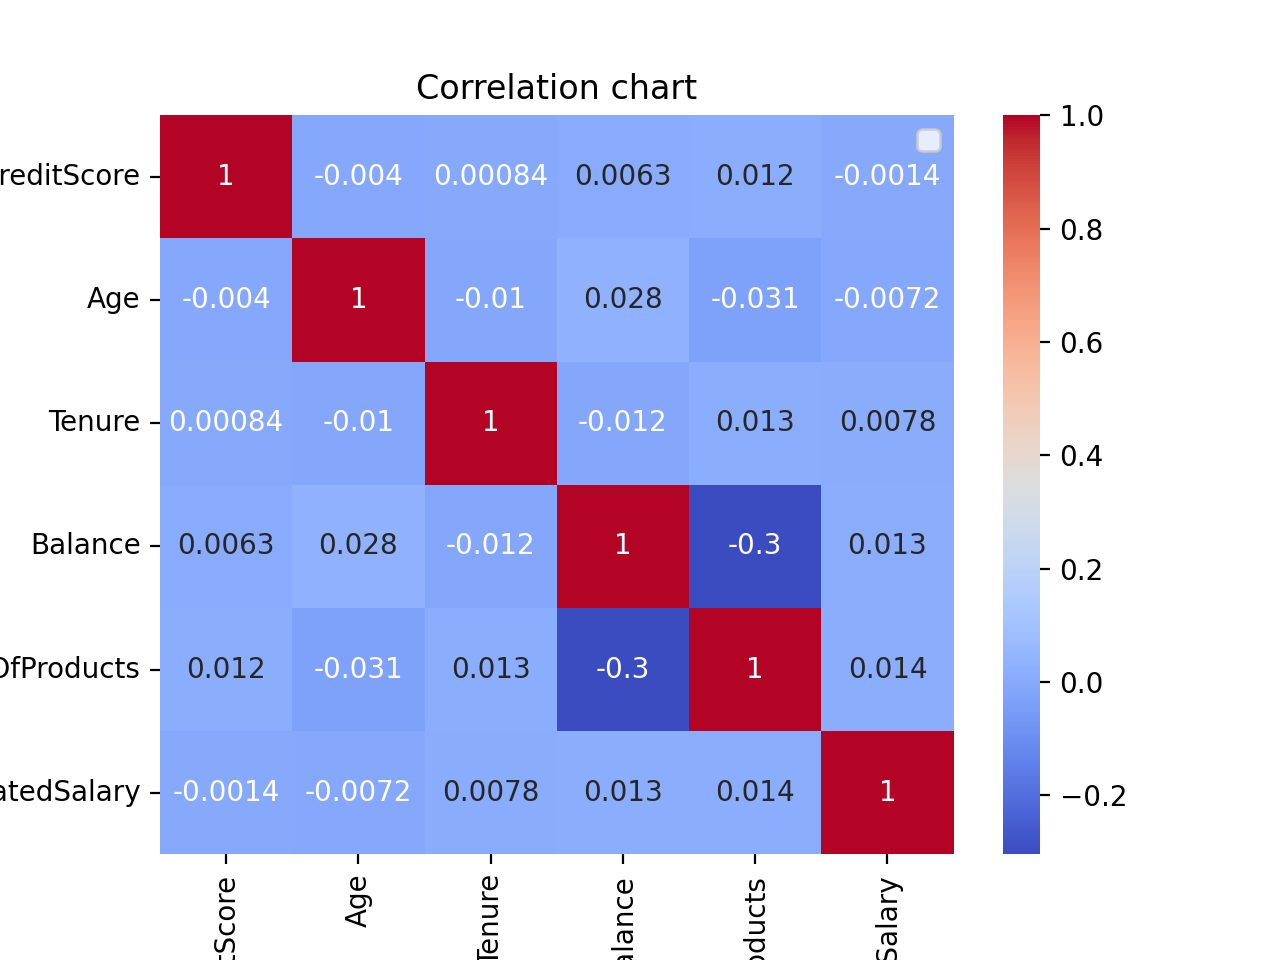

In [13]:
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation chart")
plt.legend()
plt.show()

Data Transformation

Dummies

In [14]:
data["Gender"] = np.where(data["Gender"] == "Female", 0, 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df = pd.get_dummies(data[["Geography"]])


In [16]:
df['Geography_France'] = df['Geography_France'].astype(int)
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [17]:
df = pd.concat((data, df), axis=1) 
df = df.drop(["Geography"], axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


Regression Model


In [65]:
df_reg = df

cont = ["Age", "Tenure", "NumOfProducts", "EstimatedSalary"]
features = ["Geography_Germany", "Geography_France","Geography_Spain","Gender",
            "Age", "Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary", "Exited"]


X = df_reg[features]
y = df_reg["CreditScore"]

#z score
z = StandardScaler()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=100, shuffle = True)

# Further split the temporary set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=100)

# Further split the temporary set into validation and test sets
# X_train, y_train: Training data
# X_valid, y_valid: Validation data
# X_test, y_test: Test data

X_train[cont] = z.fit_transform(X_train[cont])
X_valid[cont] = z.transform(X_valid[cont])
X_test[cont] = z.transform(X_test[cont])


In [66]:
model = keras.Sequential([
    layers.Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="linear")
])

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

In [67]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 30ms/step - loss: 429596.4062 - mean_absolute_error: 648.3267 - val_loss: 430633.5625 - val_mean_absolute_error: 648.8633
Epoch 2/30
16/16 [==============================] - 0s 11ms/step - loss: 401302.2812 - mean_absolute_error: 625.8997 - val_loss: 350503.0625 - val_mean_absolute_error: 583.5135
Epoch 3/30
16/16 [==============================] - 0s 9ms/step - loss: 211121.0000 - mean_absolute_error: 428.9926 - val_loss: 36383.3125 - val_mean_absolute_error: 153.8916
Epoch 4/30
16/16 [==============================] - 0s 8ms/step - loss: 43383.5508 - mean_absolute_error: 167.6915 - val_loss: 32839.2344 - val_mean_absolute_error: 146.0086
Epoch 5/30
16/16 [==============================] - 0s 8ms/step - loss: 31349.0020 - mean_absolute_error: 141.6137 - val_loss: 27955.1465 - val_mean_absolute_error: 132.9364
Epoch 6/30
16/16 [==============================] - 0s 8ms/step - loss: 26457.7578 - mean_absolute_error: 130.5392 - val_lo

In [68]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

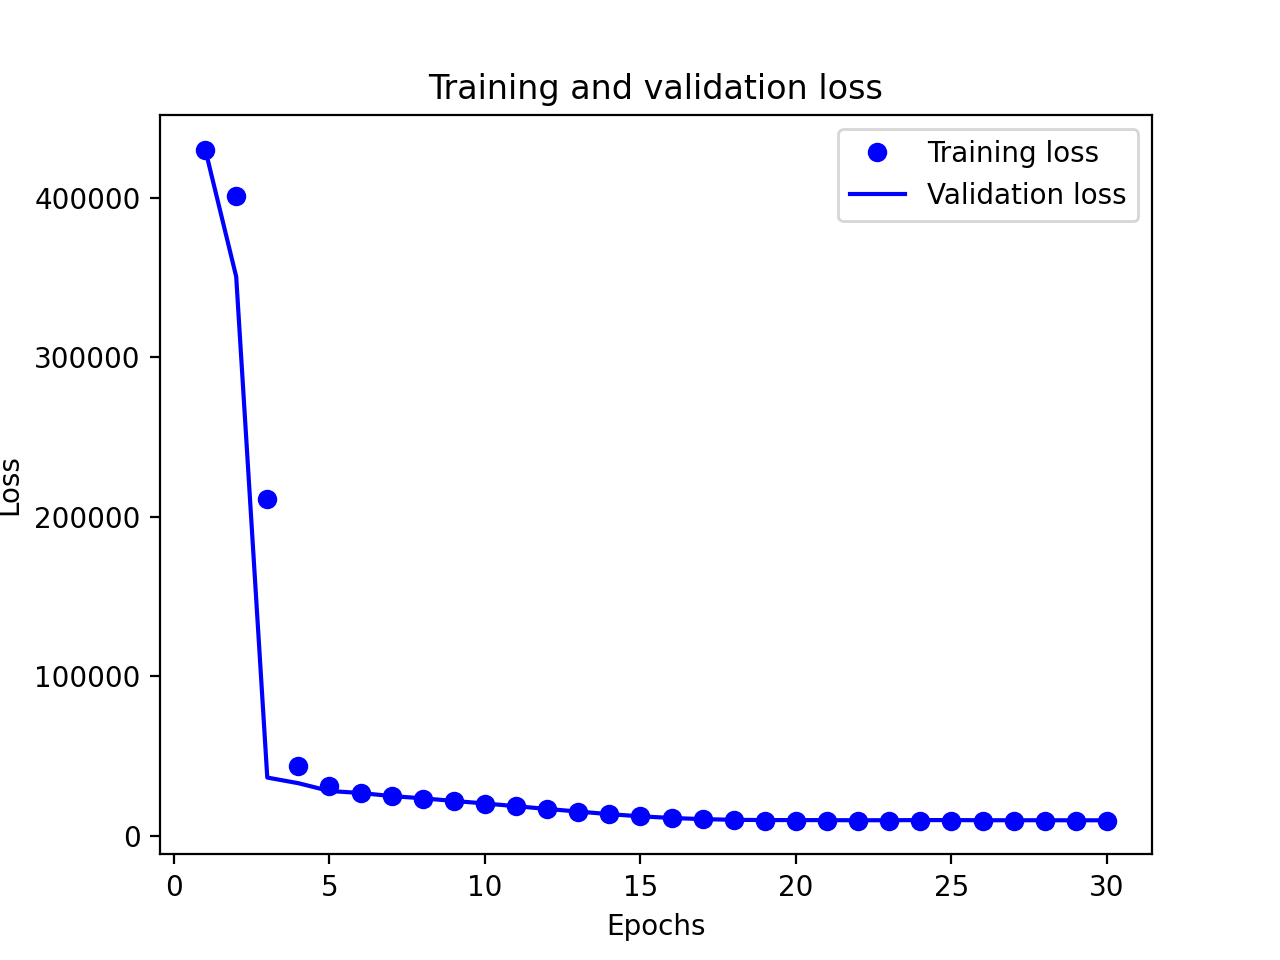

In [69]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

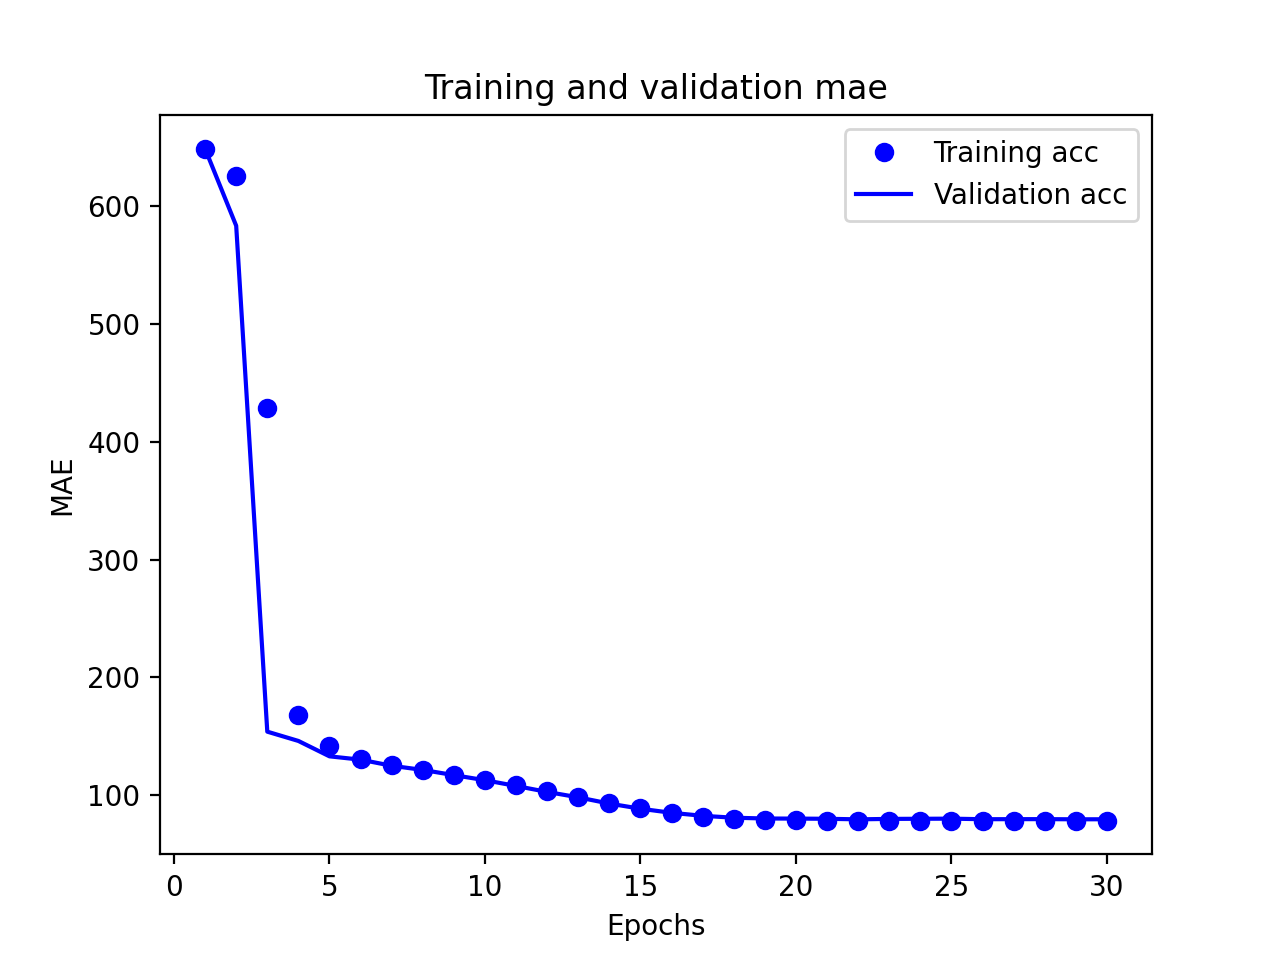

In [70]:
plt.clf()
mae = history_dict["mean_absolute_error"]
val_mae = history_dict["val_mean_absolute_error"]
plt.plot(epochs, mae, "bo", label="Training acc")
plt.plot(epochs, val_mae, "b", label="Validation acc")
plt.title("Training and validation mae")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [71]:
model = keras.Sequential([
    layers.Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="linear")
])
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [72]:
model.fit(X_train, y_train,
          epochs=15, batch_size=512, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 13243.4746 - mae: 92.4868


32/32 [==============================] - 0s 2ms/step


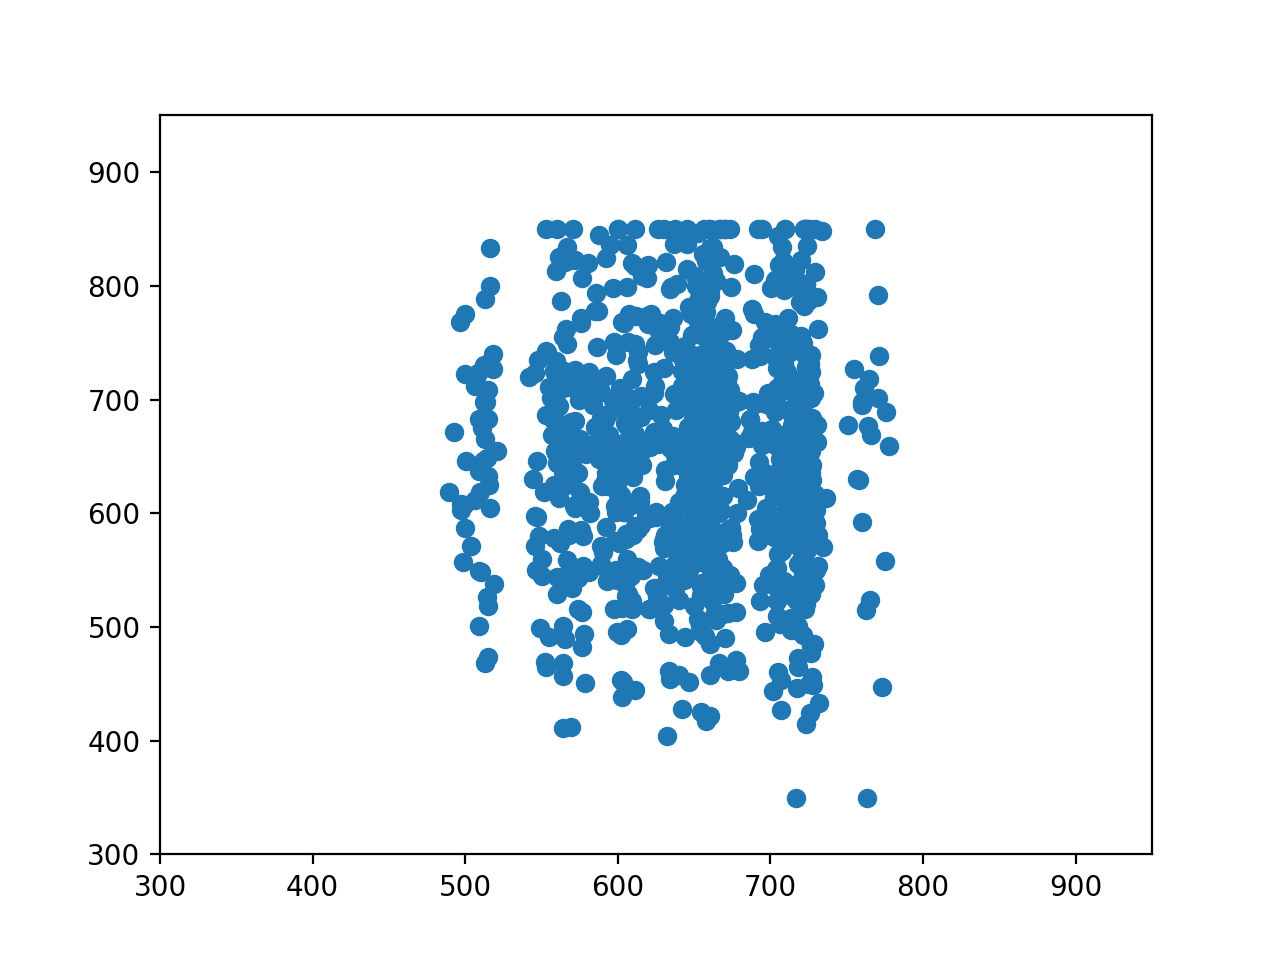

In [73]:
y_pred = model.predict(X_test)

plt.scatter(y_pred, y_test)
plt.xlim(300, 950)
plt.ylim(300, 950)
plt.show()

In [74]:
print("y_pred distribution: ")
print("MAX:", max(y_pred))
print("MIN:",min(y_pred))
print("mean:", y_pred.mean())
print("std:", y_pred.std())

print("_______________")

print("Data distribution: ")
print("MAX:", max(y_train))
print("MIN:", min(y_train))
print("mean:", y_train.mean())
print("mean:", y_train.std())

y_pred distribution: 
MAX: [777.37787]
MIN: [489.3899]
mean: 647.7945
std: 60.895058
_______________
Data distribution: 
MAX: 850
MIN: 350
mean: 649.848
mean: 96.27164912269396


Binary Classification

In [28]:
df_bin = df

cont2 = ["CreditScore", "Age", "Tenure", "NumOfProducts", "EstimatedSalary", "Tenure"]
features2 = ["CreditScore","Geography_Germany", "Geography_France","Geography_Spain","Gender",
            "Age", "Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]

X = df_bin[features2]
y = df_bin["Exited"]

#z score
z = StandardScaler()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123, shuffle = True)

# Further split the temporary set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# X_train, y_train: Training data
# X_valid, y_valid: Validation data
# X_test, y_test: Test data

X_train[cont2] = z.fit_transform(X_train[cont2])
X_valid[cont2] = z.transform(X_valid[cont2])
X_test[cont2] = z.transform(X_test[cont2])

In [29]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [30]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 0.8716 - accuracy: 0.4881 - val_loss: 0.5757 - val_accuracy: 0.7230
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5197 - accuracy: 0.7683 - val_loss: 0.4699 - val_accuracy: 0.7990
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4653 - accuracy: 0.8010 - val_loss: 0.4399 - val_accuracy: 0.8130
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4466 - accuracy: 0.8084 - val_loss: 0.4260 - val_accuracy: 0.8080
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4395 - accuracy: 0.8084 - val_loss: 0.4190 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4369 - accuracy: 0.8079 - val_loss: 0.4205 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4359 - accuracy: 0.8040 - val_loss: 0.4192 - val_accuracy: 0.8080
Epoch 8/20
16/16 [=

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

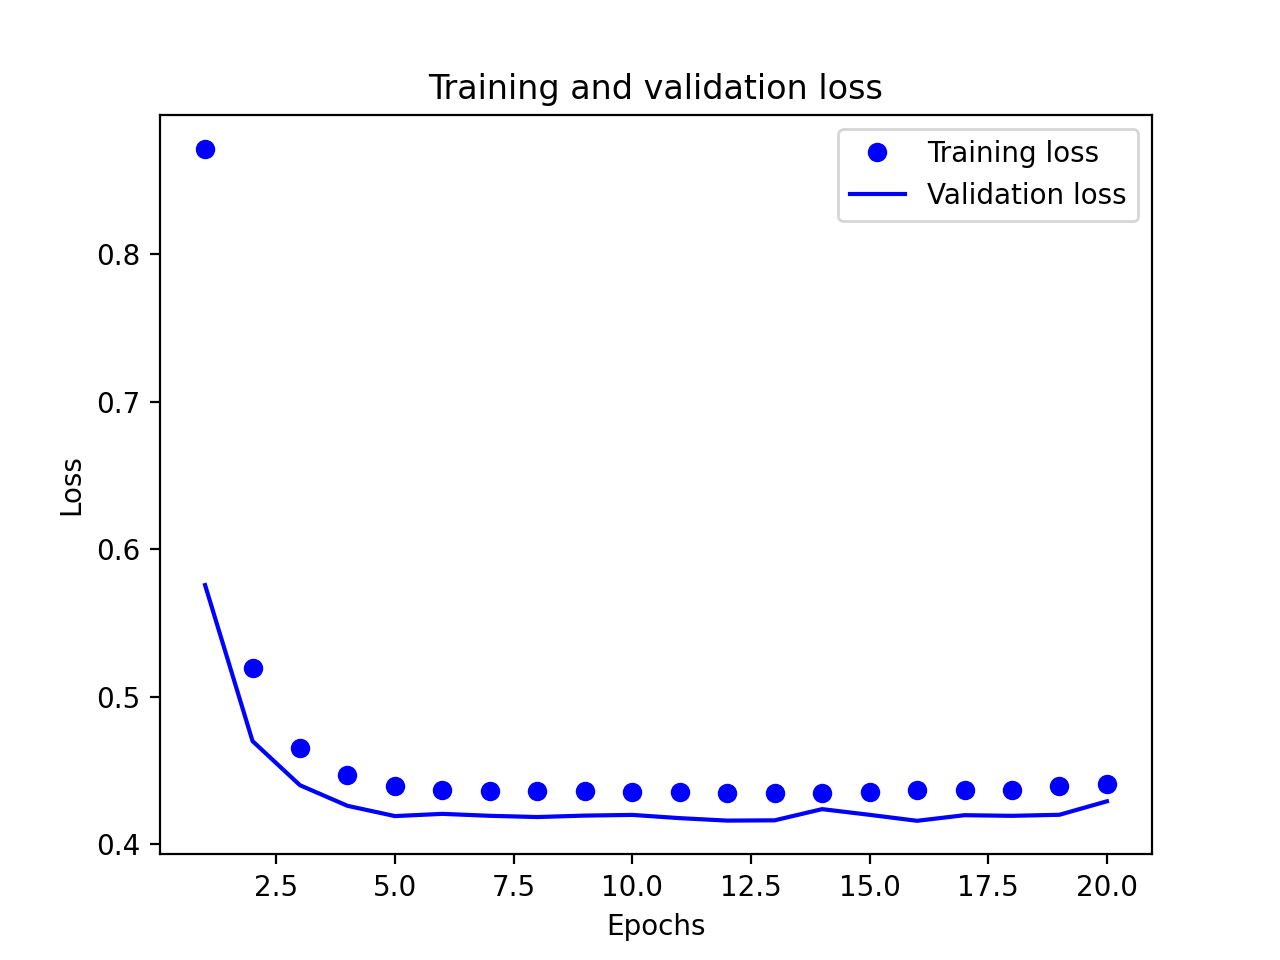

In [32]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

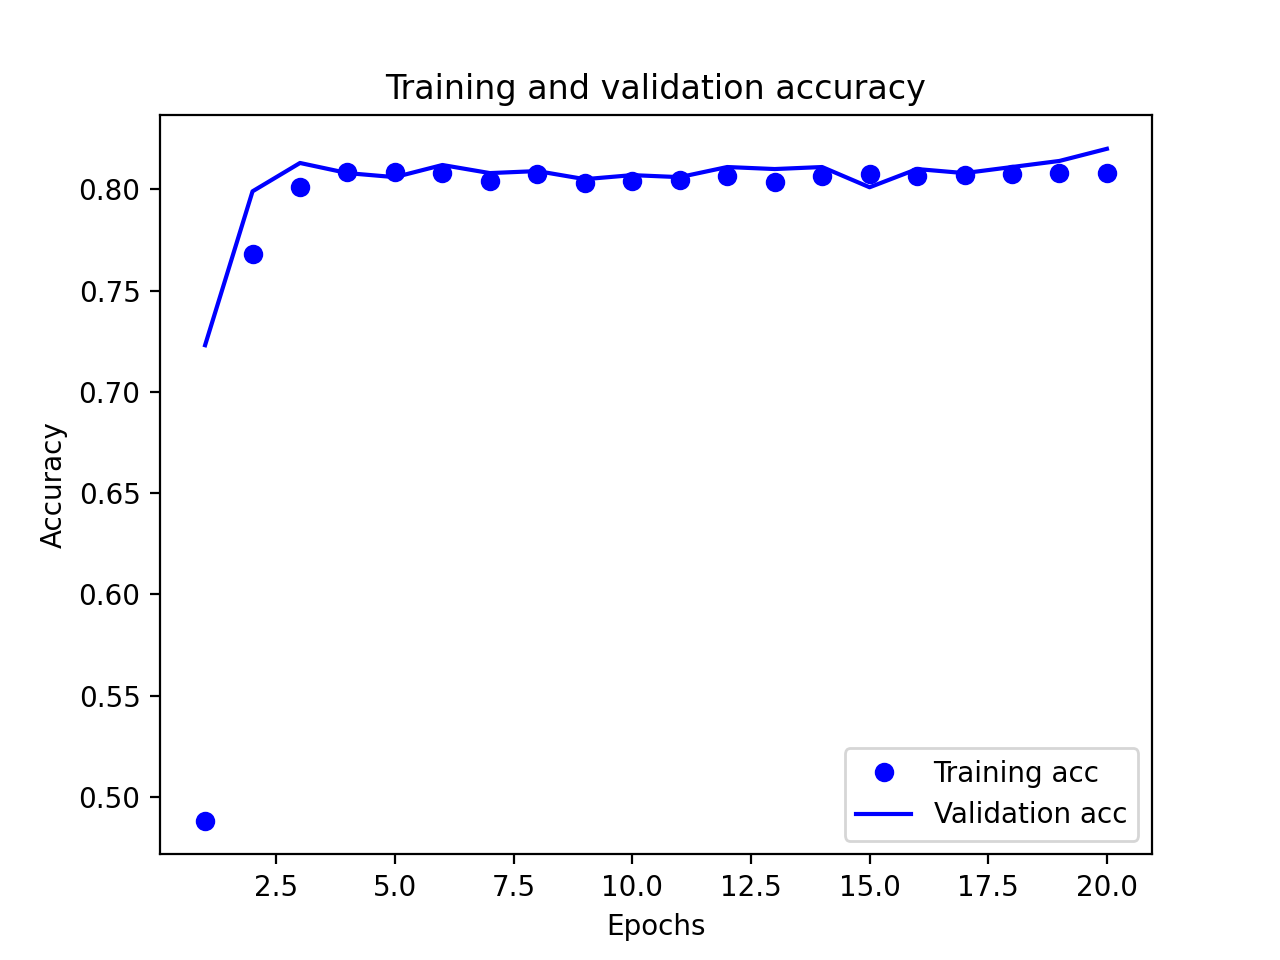

In [33]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=7, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/7
16/16 [==============================] - 1s 10ms/step - loss: 0.6216 - accuracy: 0.6710
Epoch 2/7
16/16 [==============================] - 0s 7ms/step - loss: 0.4913 - accuracy: 0.7928
Epoch 3/7
16/16 [==============================] - 0s 7ms/step - loss: 0.4644 - accuracy: 0.7960
Epoch 4/7
16/16 [==============================] - 0s 7ms/step - loss: 0.4550 - accuracy: 0.7968
Epoch 5/7
16/16 [==============================] - 0s 7ms/step - loss: 0.4522 - accuracy: 0.7989
Epoch 6/7
16/16 [==============================] - 0s 7ms/step - loss: 0.4513 - accuracy: 0.7999
Epoch 7/7
32/32 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.7920


In [35]:
results

[0.4610472321510315, 0.7920000553131104]

#### Multiclass Classification

In [36]:
data2=pd.read_csv("health.csv", low_memory=False)
data2 = data2.dropna()
data2.shape

(13906, 18)

In [37]:
data2.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [38]:
data2 = data2[["Available Extra Rooms in Hospital","Department", 
            "Ward_Type","Bed Grade","Type of Admission","Severity of Illness",
             "Visitors with Patient","Age", "Admission_Deposit", "Stay"]]  

In [39]:
data2.shape

(13906, 10)

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


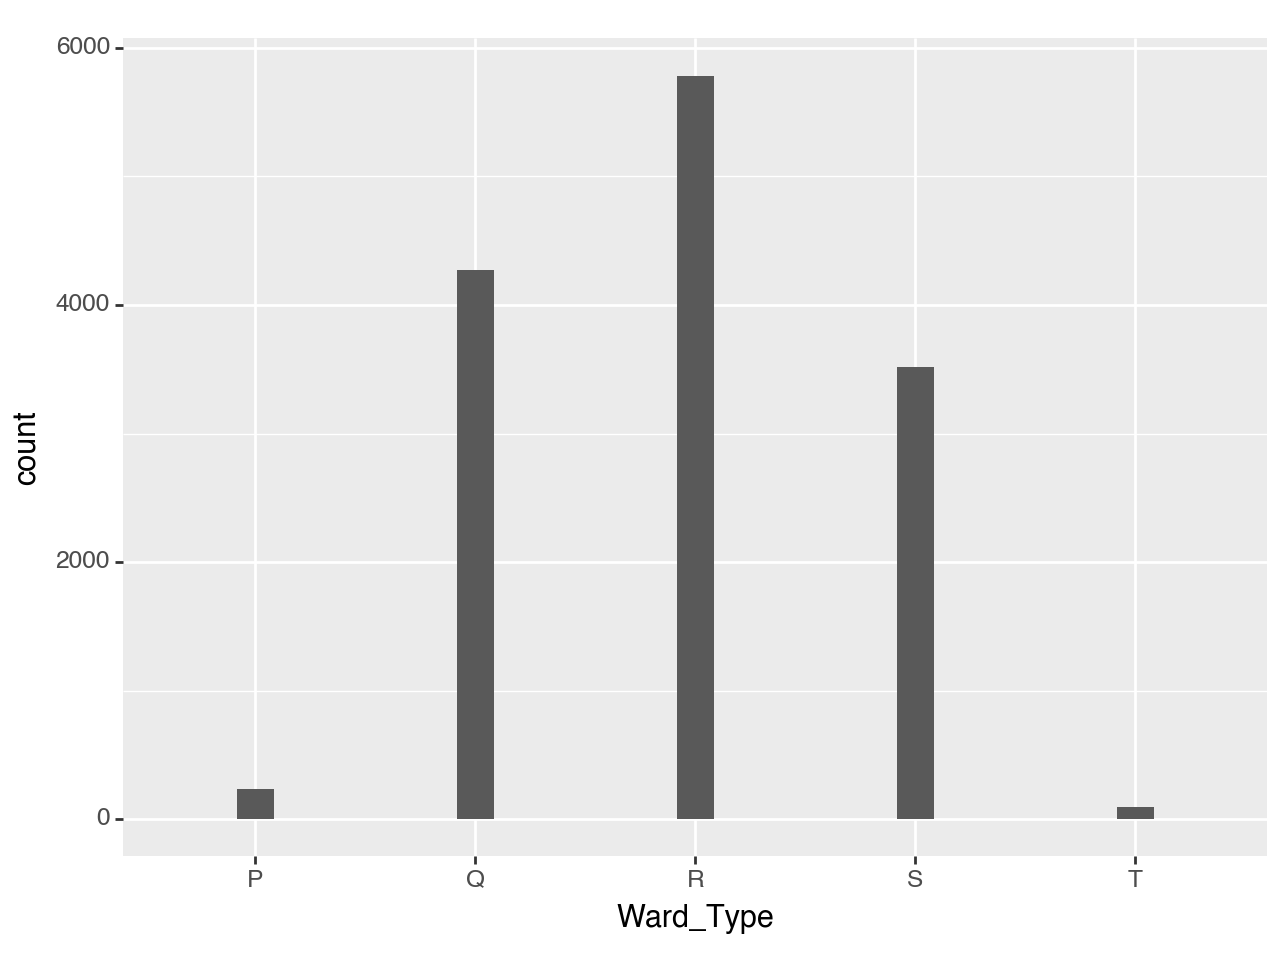

<Figure Size: (640 x 480)>

In [40]:
(ggplot(data2, aes(x = "Ward_Type")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 85'. Pick better value with 'binwidth'.


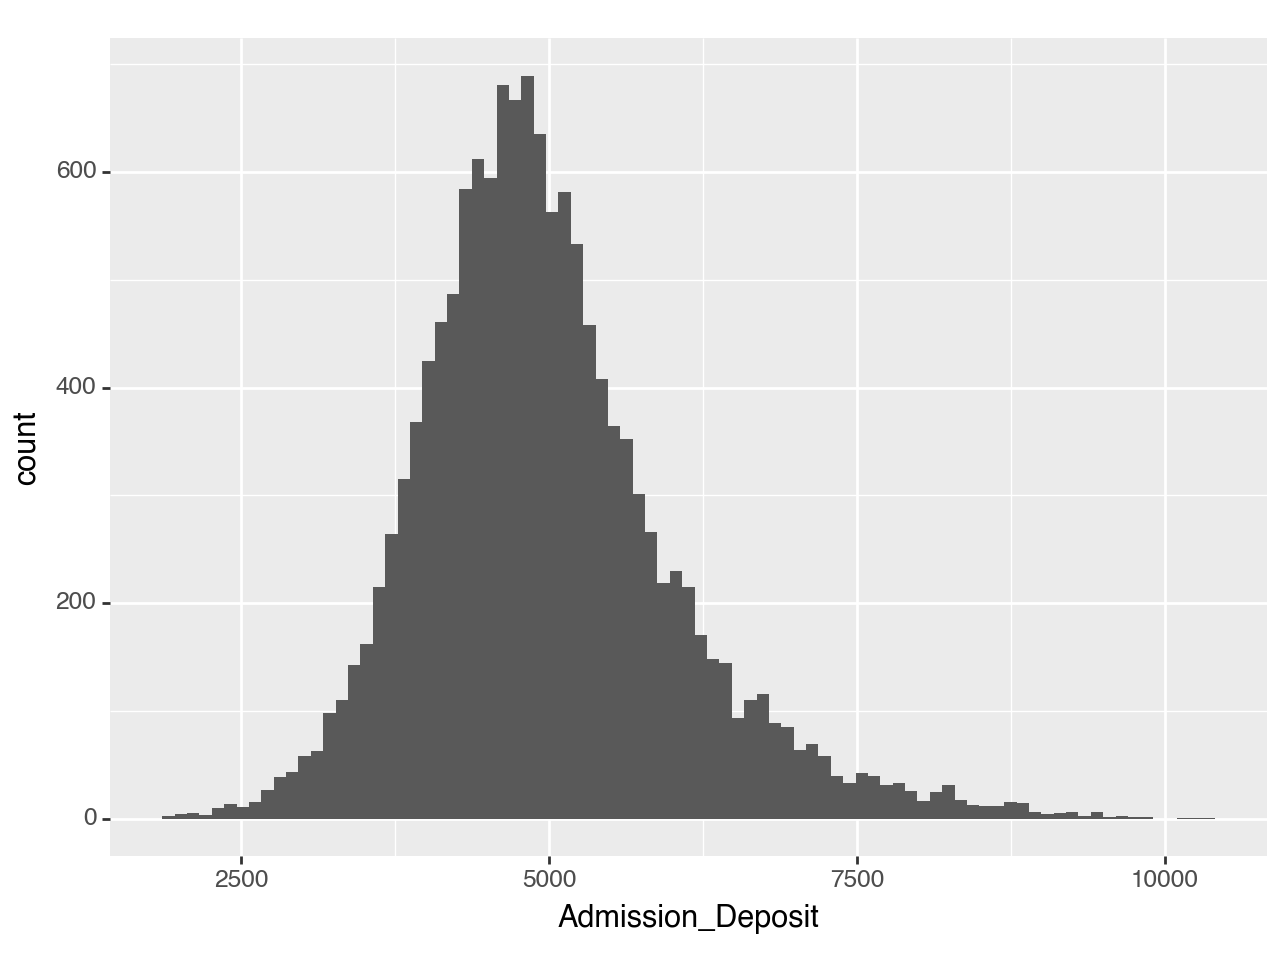

<Figure Size: (640 x 480)>

In [41]:
(ggplot(data2, aes(x = "Admission_Deposit")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 145'. Pick better value with 'binwidth'.


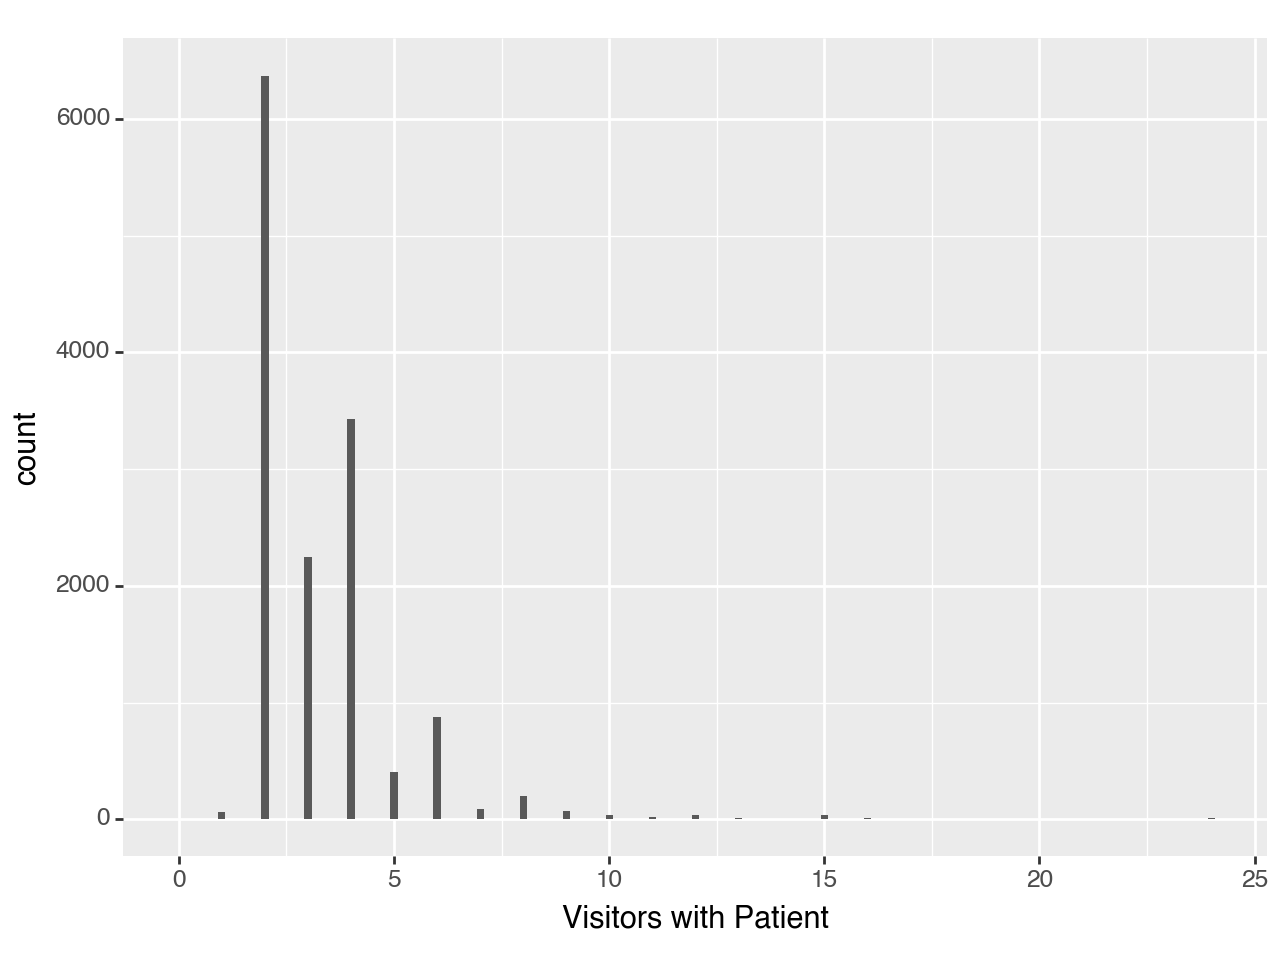

<Figure Size: (640 x 480)>

In [42]:
(ggplot(data2, aes(x = "Visitors with Patient")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


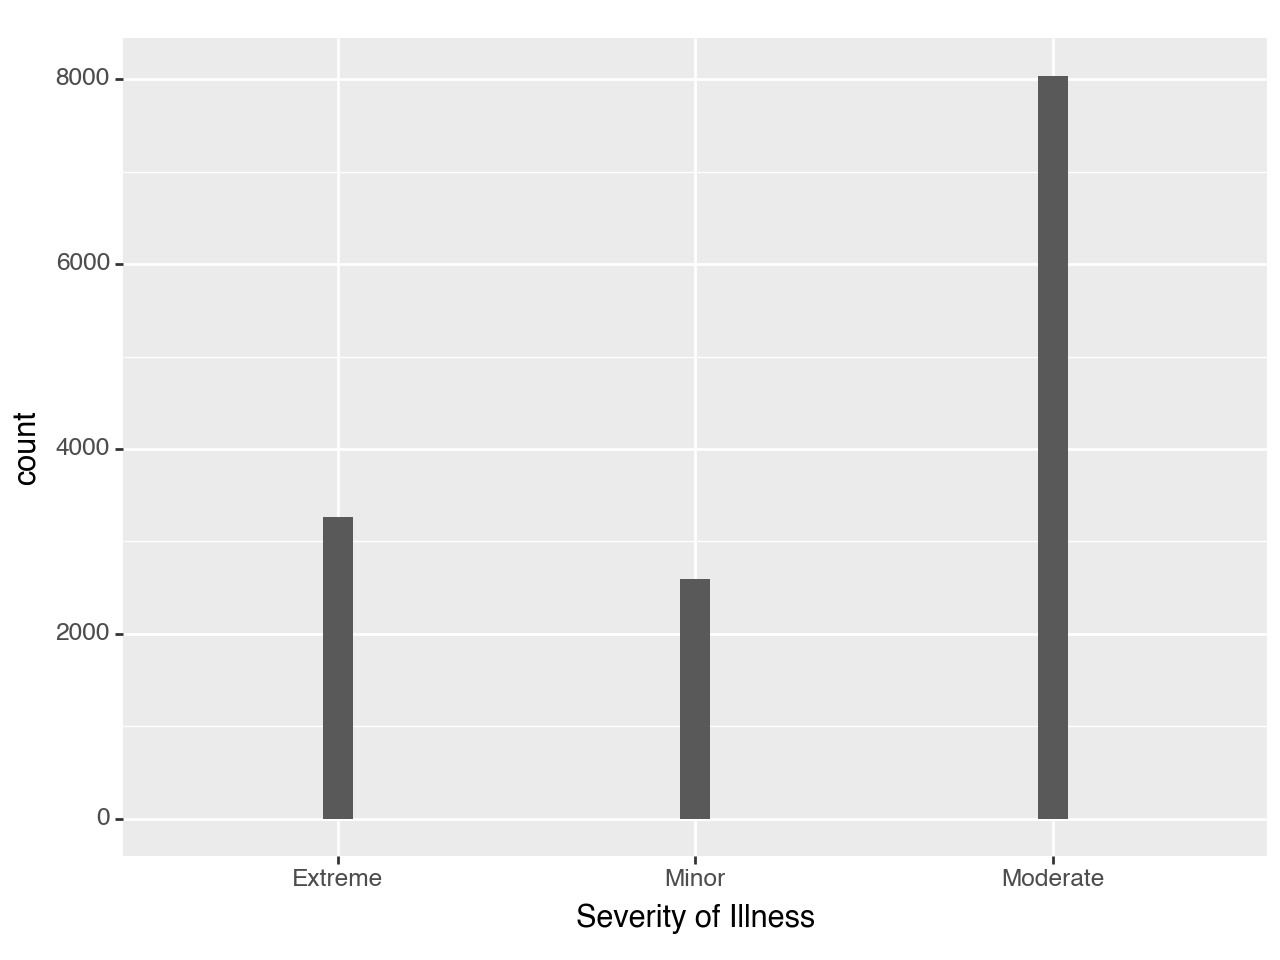

<Figure Size: (640 x 480)>

In [43]:
(ggplot(data2, aes(x = "Severity of Illness")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


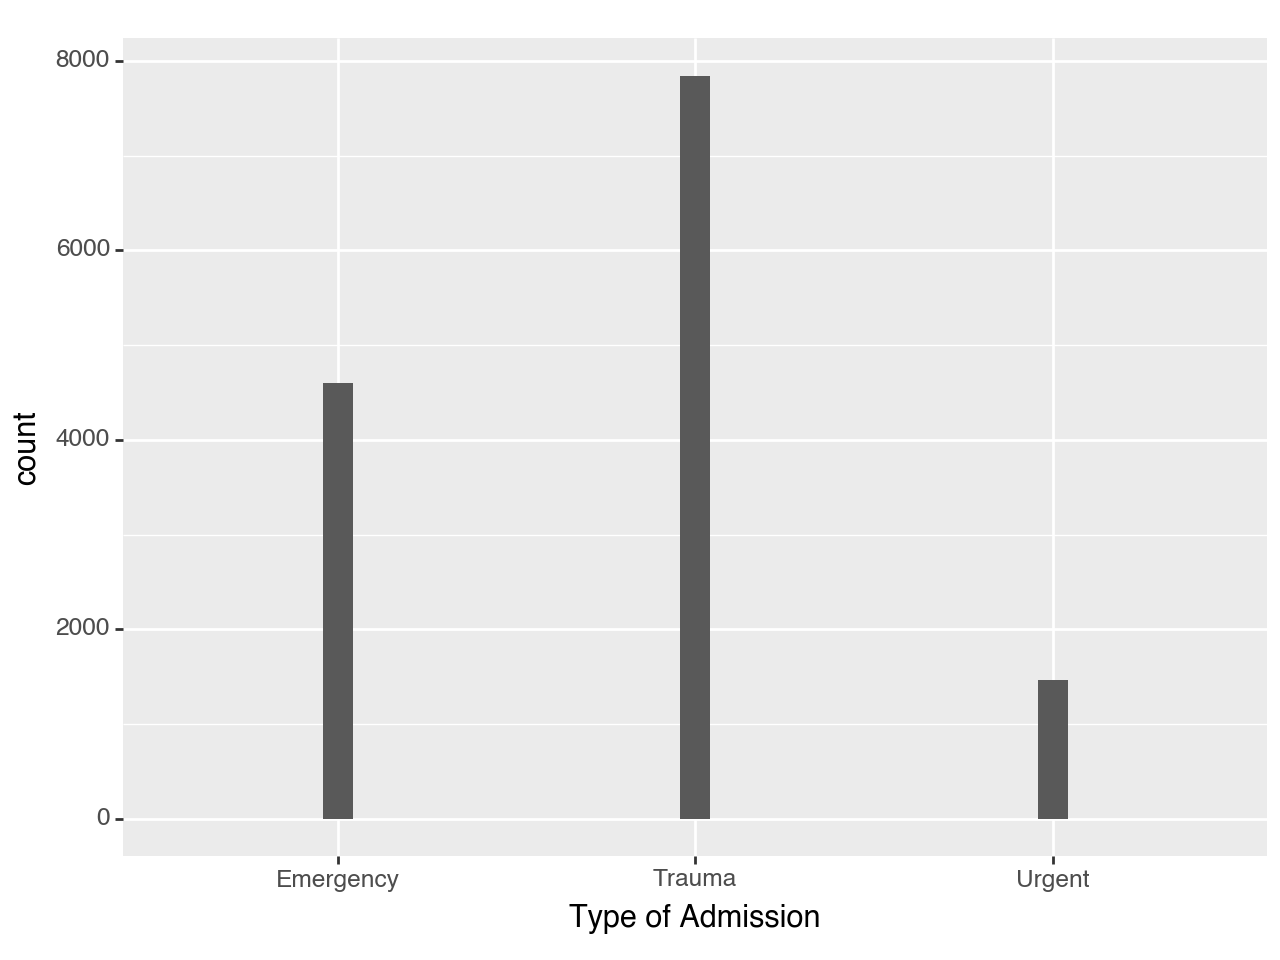

<Figure Size: (640 x 480)>

In [44]:
(ggplot(data2, aes(x = "Type of Admission")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 55'. Pick better value with 'binwidth'.


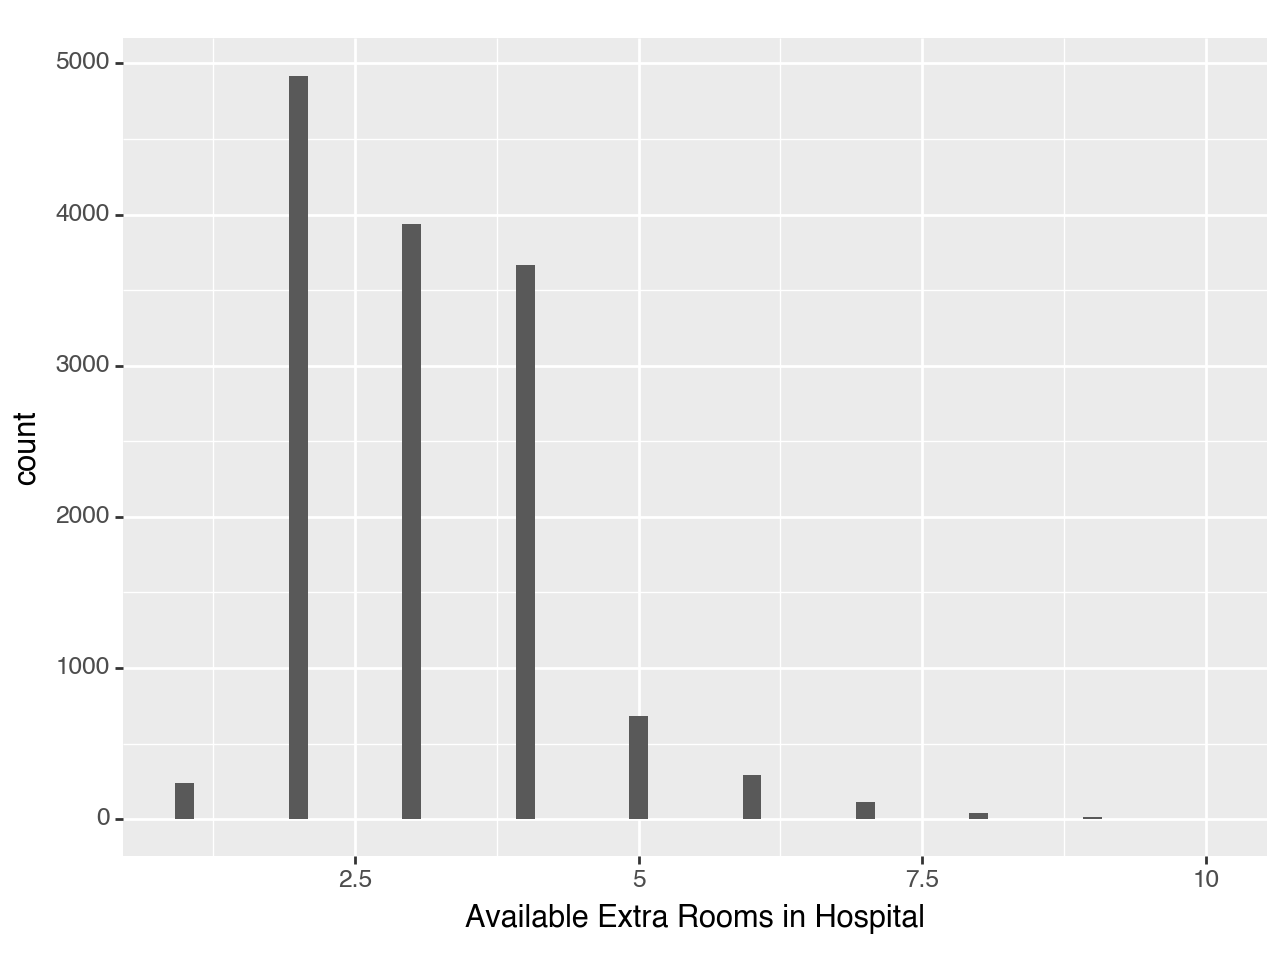

<Figure Size: (640 x 480)>

In [45]:
(ggplot(data2, aes(x = "Available Extra Rooms in Hospital")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


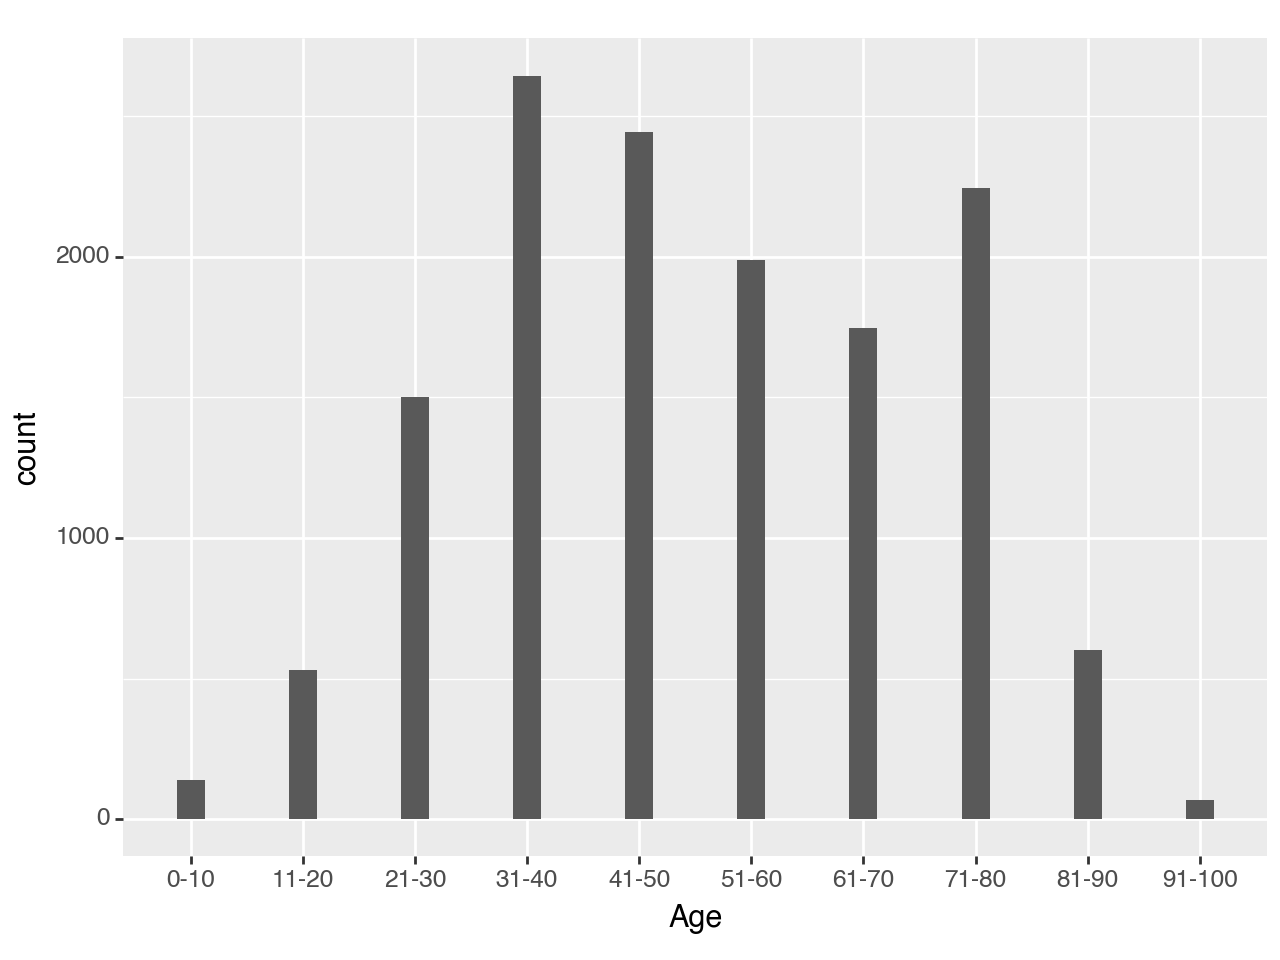

<Figure Size: (640 x 480)>

In [46]:
data2['Age'] = data2['Age'].astype(str)

for index, row in data2.iterrows():
    if row['Age'] == '20-Nov':
        data2.loc[index, 'Age'] = '11-20'
        
(ggplot(data2, aes(x = "Age")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 41'. Pick better value with 'binwidth'.


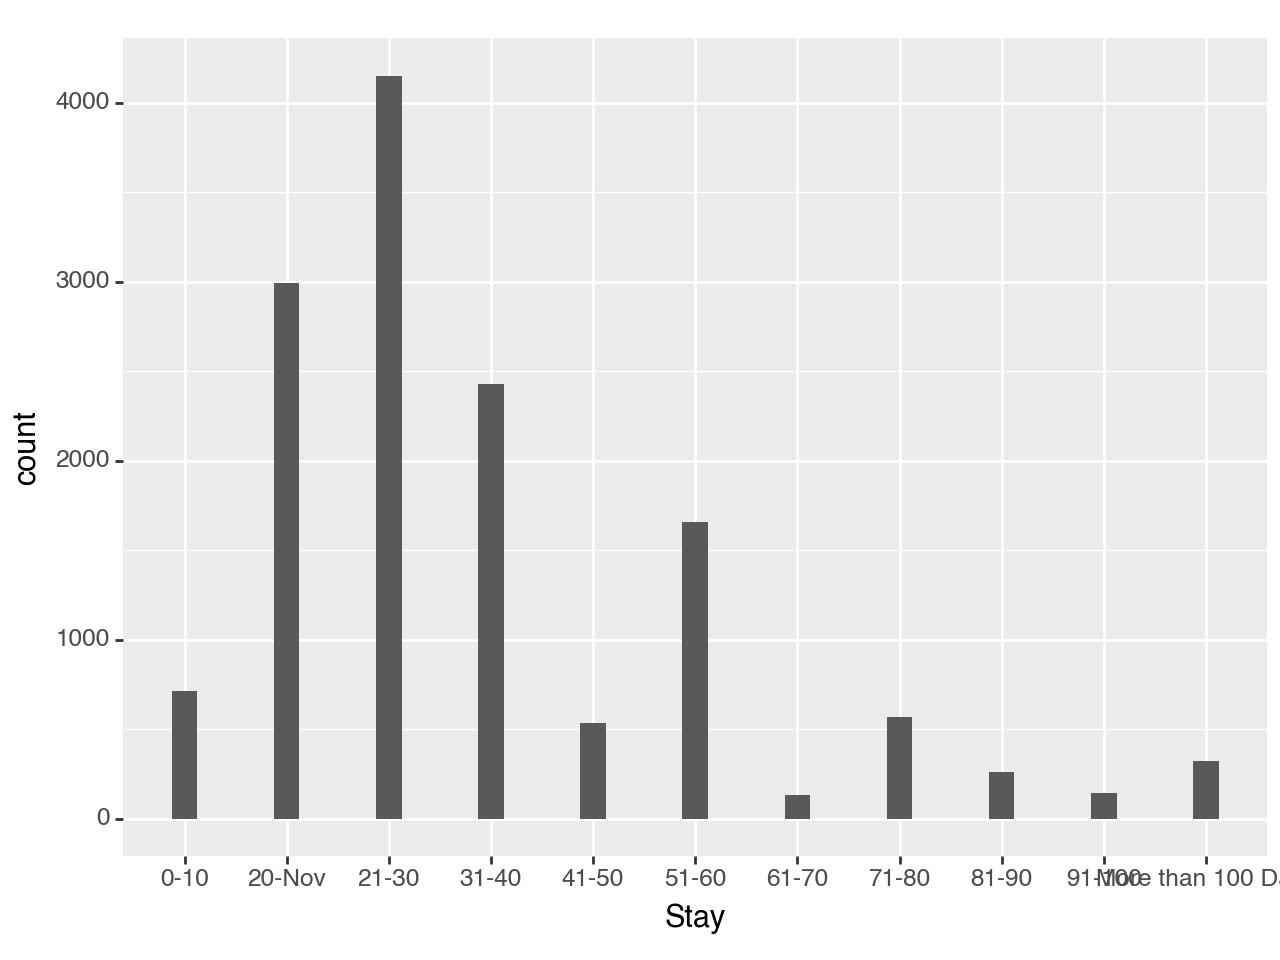

<Figure Size: (640 x 480)>

In [47]:
(ggplot(data2, aes(x = "Stay")) + geom_histogram())

/Applications/miniconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.


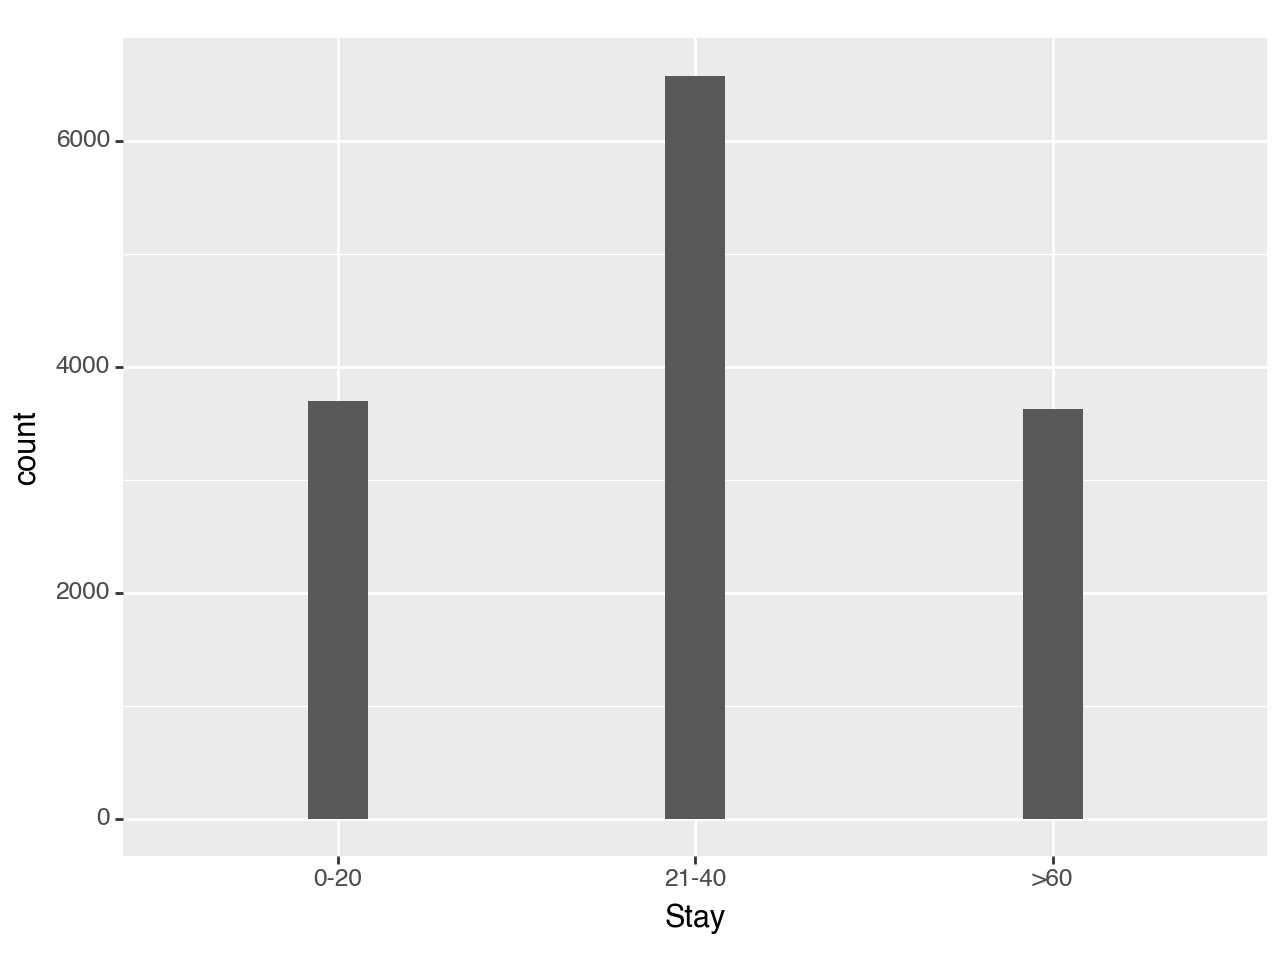

<Figure Size: (640 x 480)>

In [48]:
data2['Stay'] = data2['Stay'].astype(str)

#excel changed 11-20 to Nov-20
for index, row in data2.iterrows():
    if row['Stay'] == '20-Nov':
        data2.loc[index, 'Stay'] = '11-20'
    if row['Stay'] == 'weight':
        data2.drop(index, 'Stay')

#creating four outcome variables instead of 13
data2['Stay']= data2['Stay'].replace({'0-10':"0-20", '11-20':"0-20", '21-30':"21-40", 
                                      '31-40':"21-40", '41-50':">60", '51-60':">60",'61-70':">60",
                                      '71-80':">60",'81-90':">60",'91-100':">60",'More than 100 Days':">60"})
             

(ggplot(data2, aes(x = "Stay")) + geom_histogram())

In [49]:
data2['Stay'].value_counts()

Stay
21-40    6581
0-20     3701
>60      3624
Name: count, dtype: int64

In [50]:
df2 = pd.get_dummies(data2[["Department","Ward_Type","Type of Admission",
                            "Severity of Illness","Age", "Stay"]])
df2.head()

,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,...,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,Stay_0-20,Stay_21-40,Stay_>60
0,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True


In [51]:
df2.columns

Index(['Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
       'Ward_Type_S', 'Ward_Type_T', 'Type of Admission_Emergency',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'Severity of Illness_Extreme', 'Severity of Illness_Minor',
       'Severity of Illness_Moderate', 'Age_0-10', 'Age_11-20', 'Age_21-30',
       'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80',
       'Age_81-90', 'Age_91-100', 'Stay_0-20', 'Stay_21-40', 'Stay_>60'],
      dtype='object')

In [52]:
columns_to_convert = ['Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
       'Ward_Type_S', 'Ward_Type_T', 'Type of Admission_Emergency',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'Severity of Illness_Extreme', 'Severity of Illness_Minor',
       'Severity of Illness_Moderate', 'Age_0-10', 'Age_11-20', 'Age_21-30',
       'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80',
       'Age_81-90', 'Age_91-100', 'Stay_0-20', 'Stay_21-40',
       'Stay_>60']

for column_name in columns_to_convert:
    df2[column_name] = df2[column_name].astype(int)

In [53]:
df2 = pd.concat((data2, df2), axis=1) 

#dropping duplicates without dummies
df2 = df2.drop(["Department","Ward_Type","Type of Admission","Severity of Illness","Age","Stay"], axis=1)
df2.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,...,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,Stay_0-20,Stay_21-40,Stay_>60
0,3,2.0,2,4911,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2,2.0,2,5954,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,2.0,2,4745,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2,2.0,2,7272,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2,2.0,2,5558,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [54]:
cont2 = ["Available Extra Rooms in Hospital", "Bed Grade", "Visitors with Patient","Visitors with Patient"]

features2 = ["Available Extra Rooms in Hospital", "Bed Grade", "Visitors with Patient","Visitors with Patient", 
            'Department_TB & Chest disease', 'Department_anesthesia',
            'Department_gynecology', 'Department_radiotherapy',
            'Department_surgery', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
            'Ward_Type_S', 'Ward_Type_T', 'Type of Admission_Emergency',
            'Type of Admission_Trauma', 'Type of Admission_Urgent', 'Age_0-10', 'Age_11-20', 'Age_21-30',
            'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80',
            'Age_81-90', 'Age_91-100','Severity of Illness_Extreme', 'Severity of Illness_Minor',
             'Severity of Illness_Moderate']

output = ['Stay_0-20', 'Stay_21-40','Stay_>60']

X = df2[features2]
y = df2[output]


z = StandardScaler()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# X_train, y_train: Training data
# X_valid, y_valid: Validation data
# X_test, y_test: Test data

X_train[cont2] = z.fit_transform(X_train[cont2])
X_valid[cont2] = z.fit_transform(X_valid[cont2])
X_test[cont2] = z.transform(X_test[cont2])

In [55]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [56]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [57]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
11/11 [==============================] - 1s 24ms/step - loss: 0.9880 - accuracy: 0.5169 - val_loss: 0.9197 - val_accuracy: 0.5385
Epoch 2/20
11/11 [==============================] - 0s 13ms/step - loss: 0.8949 - accuracy: 0.5761 - val_loss: 0.9190 - val_accuracy: 0.5406
Epoch 3/20
11/11 [==============================] - 0s 12ms/step - loss: 0.8889 - accuracy: 0.5784 - val_loss: 0.9095 - val_accuracy: 0.5579
Epoch 4/20
11/11 [==============================] - 0s 12ms/step - loss: 0.8874 - accuracy: 0.5749 - val_loss: 0.9374 - val_accuracy: 0.5191
Epoch 5/20
11/11 [==============================] - 0s 15ms/step - loss: 0.8924 - accuracy: 0.5716 - val_loss: 0.9068 - val_accuracy: 0.5377
Epoch 6/20
11/11 [==============================] - 0s 13ms/step - loss: 0.8920 - accuracy: 0.5716 - val_loss: 0.9280 - val_accuracy: 0.5191
Epoch 7/20
11/11 [==============================] - 0s 12ms/step - loss: 0.9009 - accuracy: 0.5698 - val_loss: 0.9189 - val_accuracy: 0.5457
Epoch 8/20
11

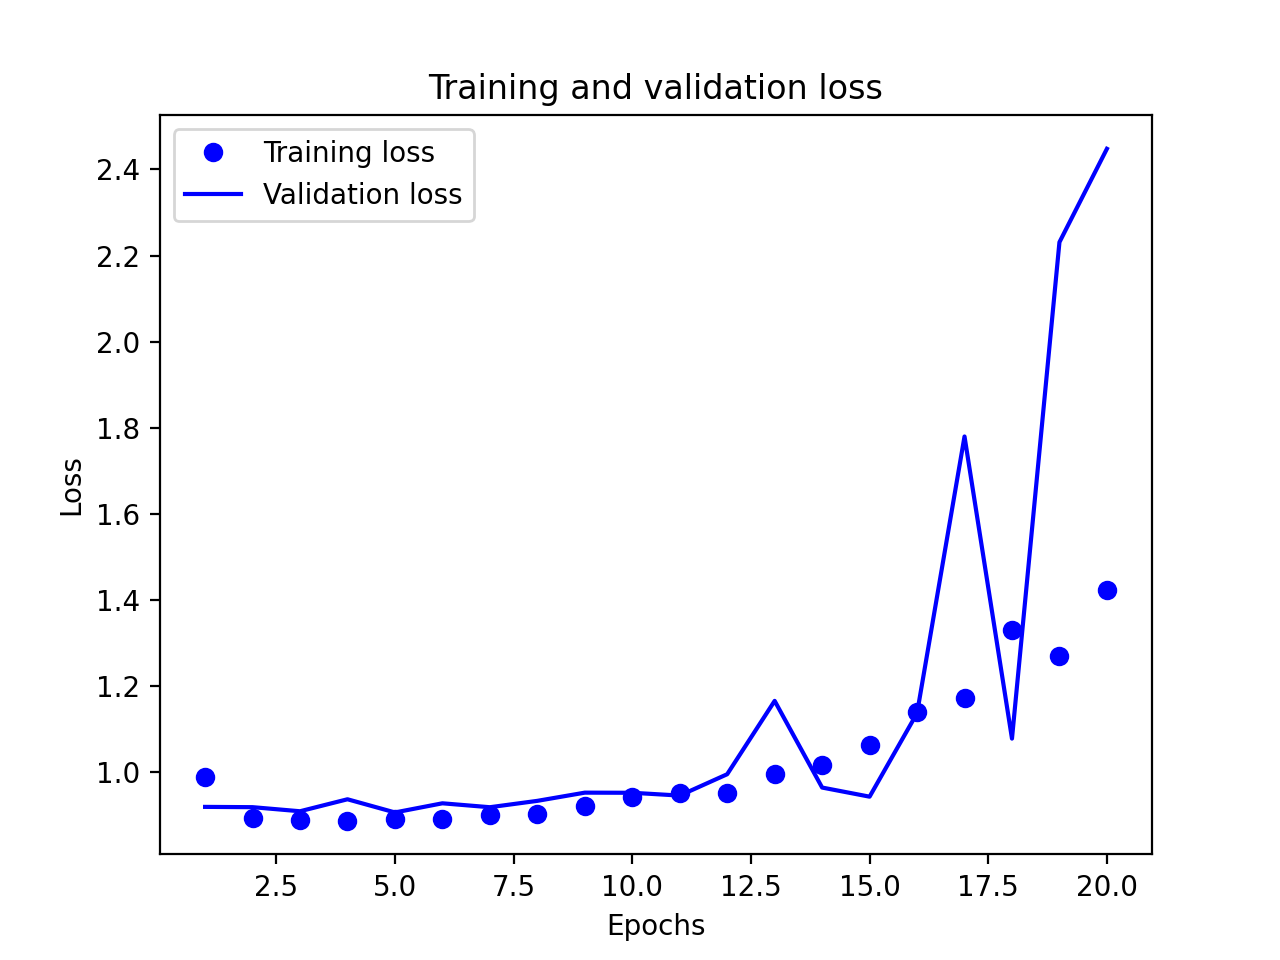

In [58]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

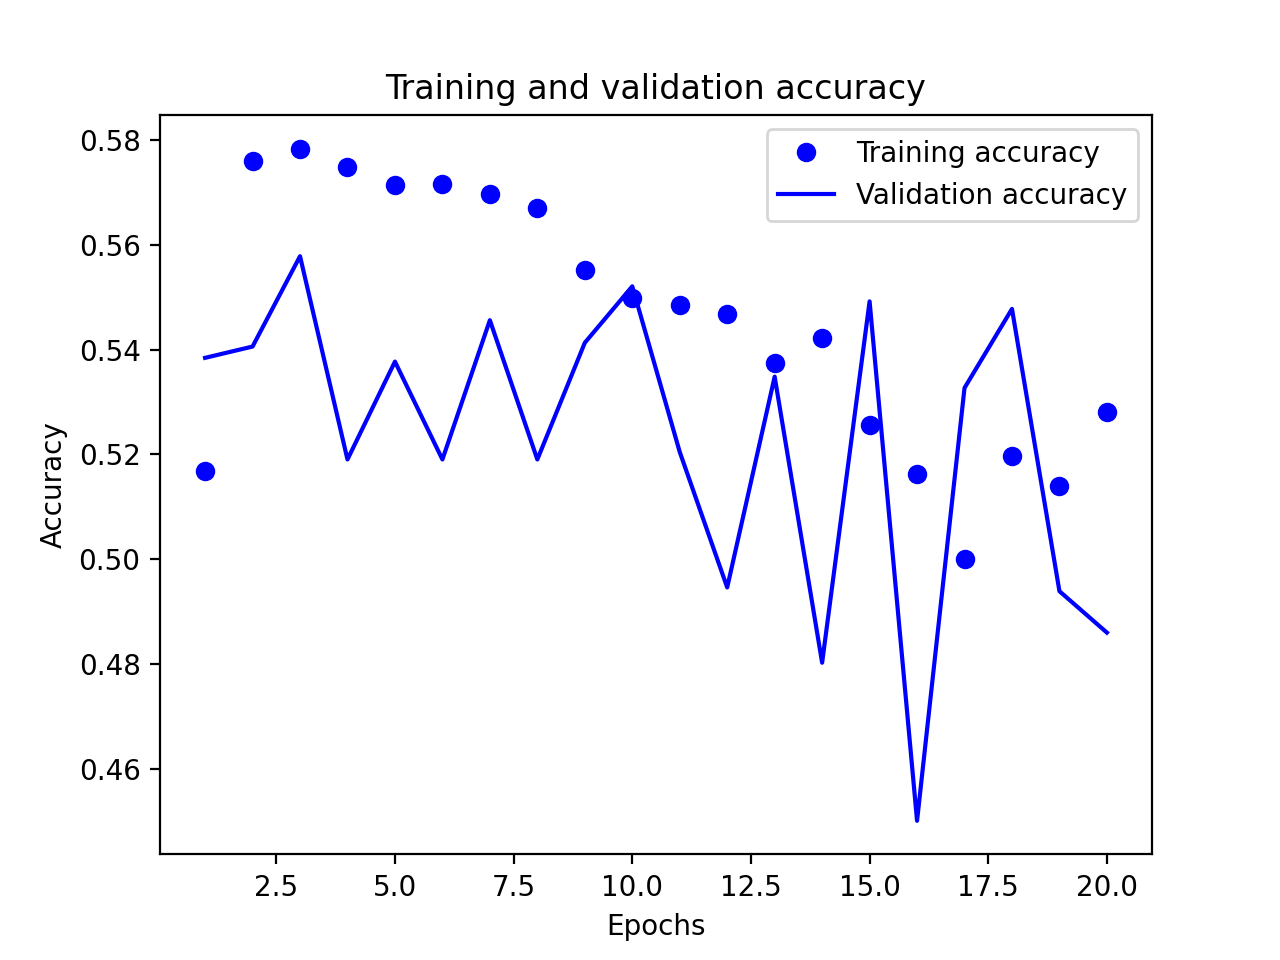

In [59]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,
          y_train,
          epochs=4,
          batch_size=1024)
results = model.evaluate(X_test, y_test)

Epoch 1/4
11/11 [==============================] - 0s 12ms/step - loss: 0.9509 - accuracy: 0.5295
Epoch 2/4
11/11 [==============================] - 0s 10ms/step - loss: 0.8960 - accuracy: 0.5691
Epoch 3/4
11/11 [==============================] - 0s 11ms/step - loss: 0.9012 - accuracy: 0.5683
Epoch 4/4
44/44 [==============================] - 0s 6ms/step - loss: 0.8807 - accuracy: 0.5780


In [61]:
results

[0.8807485699653625, 0.5780014395713806]